In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import randomized_svd

### Example Iris

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
col_names = iris.feature_names

### Standardize

In [4]:
medias = X.mean(axis=0)
desv = X.std(axis=0)

In [5]:
X_st = (X-medias)/desv

In [14]:
U[0,:]

array([-0.10837451,  0.04301984, -0.02593777])

### SVD

In [12]:
dim = 3
alpha = 1
p = X.shape[1]
n = X.shape[0]

In [22]:
U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

### Inertia

In [23]:
EV = np.power(Sigma,2)
Inertia = EV/np.sum(EV) * 100

In [24]:
Inertia

array([ 73.14730164,  23.14978929,   3.70290907])

### Initial Coordinates

In [25]:
R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

In [27]:
C[0,:]

array([ 10.9152261 ,   4.37665169,  -3.38977537])

### Contributions

###### Rows

In [32]:
sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf

###### Colums

In [35]:
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

cc = np.linalg.inv(np.diag(sc)).dot(np.power(C,2))*100

In [37]:
R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

In [38]:
sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

In [41]:
%pylab inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/Users/victor/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sca']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


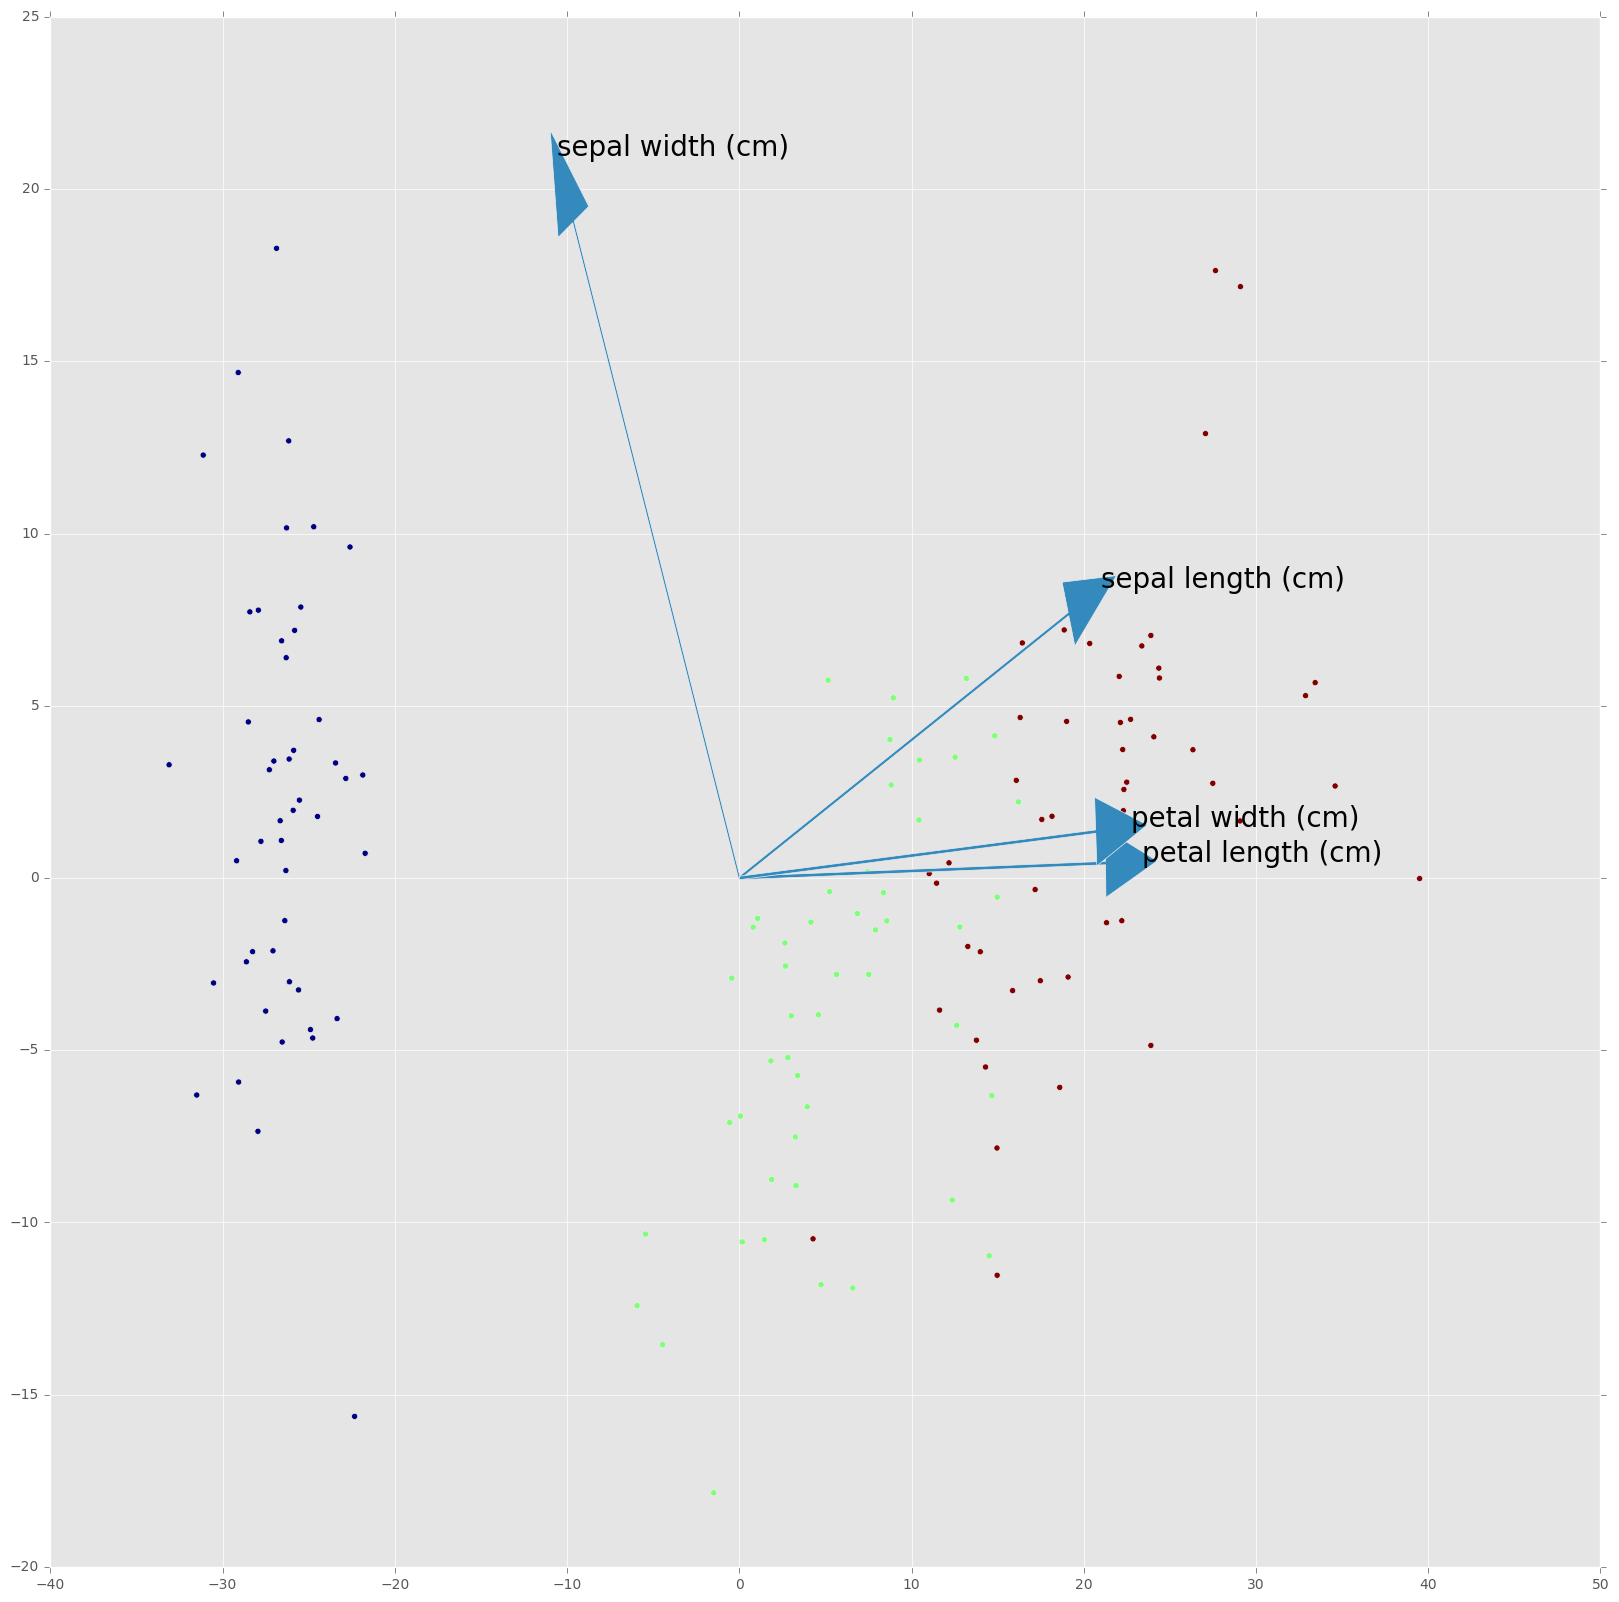

In [44]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)

ax1.scatter(R[:,0],R[:,1],c=y)
for i in range(0,C.shape[0]):
    ax1.arrow(0,0,C[i,0],C[i,1],width=0.1)
    ax1.text(C[i,0]*1.1,C[i,1]*1.1,col_names[i],fontsize=20)
    
plt.show()